# 0330

## 课题目的：*数据驱动*。结合开题思路，并延续“基于大数据采集分析的城市设计”课题
* **问题1 - 数据来源：** 大四课题使用高德地图，相关地图数据均为图像（截图）
* **问题2 - 处理方式：** 聚类（Vahid给好的代码）。但只是基于图像的聚类

** **
* **考虑1 - 数据来源：** openstreetmap等，矢量数据为主
* **考虑2 - 数据描述（难点）：** 找一种方式进行地图数据的归一化描述
* **考虑3 - 新基地预测：** 地图+信息来预测
** **
## 延伸之处：1.数据来源更有说服力 2.以矢量数据的计算为主 3.结合地图数据和信息数据进行预测，根据预测完善设计

# osmnx

* openstreetmap可视化相关的包

In [1]:
import os
# os.environ["PROJ_LIB"] = "C:\\Users\\zhangbz\\Anaconda3\\Library\\share" #windows
import osmnx as ox
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

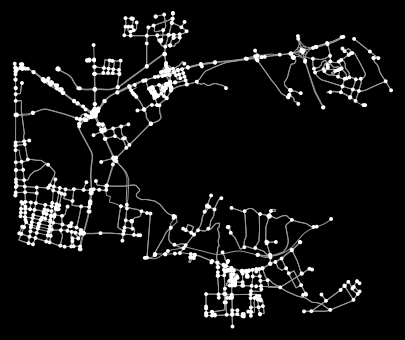

In [6]:
G = ox.graph_from_place('Xuanwu,Jiangsu, China', network_type='drive')
fig, ax = ox.plot_graph(G,node_zorder=2, node_color='w',bgcolor='k')

In [2]:
img_folder = 'images'
extension = 'png'
size = 400

In [ ]:
place1 = 'University of Cumbria, Lancaster Campus'
# beijing_weiminghu = ox.gdf_from_place(place1, which_result = 1)
nanjing_xuanwuhu = ox.gdf_from_place(place1, which_result = 1)
print (nanjing_xuanwuhu)
ox.plot_shape(ox.project_gdf(nanjing_xuanwuhu))

In [2]:
# G = ox.graph_from_place('beijing,china',which_result = 2)
# ox.plot_graph(G)

#用bounding box框选需要区域
G = ox.graph_from_bbox(32.0648, 32.0202, 118.8165, 118.7486, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected,fig_height=10)

RuntimeError: b'no arguments in initialization list'

In [3]:
ec1 = ox.get_edge_colors_by_attr(G , attr = 'length',cmap='autumn',start=0.2, stop=0.9)
ox.plot_graph(G,fig_height=10,edge_color=ec1)

NameError: name 'G' is not defined

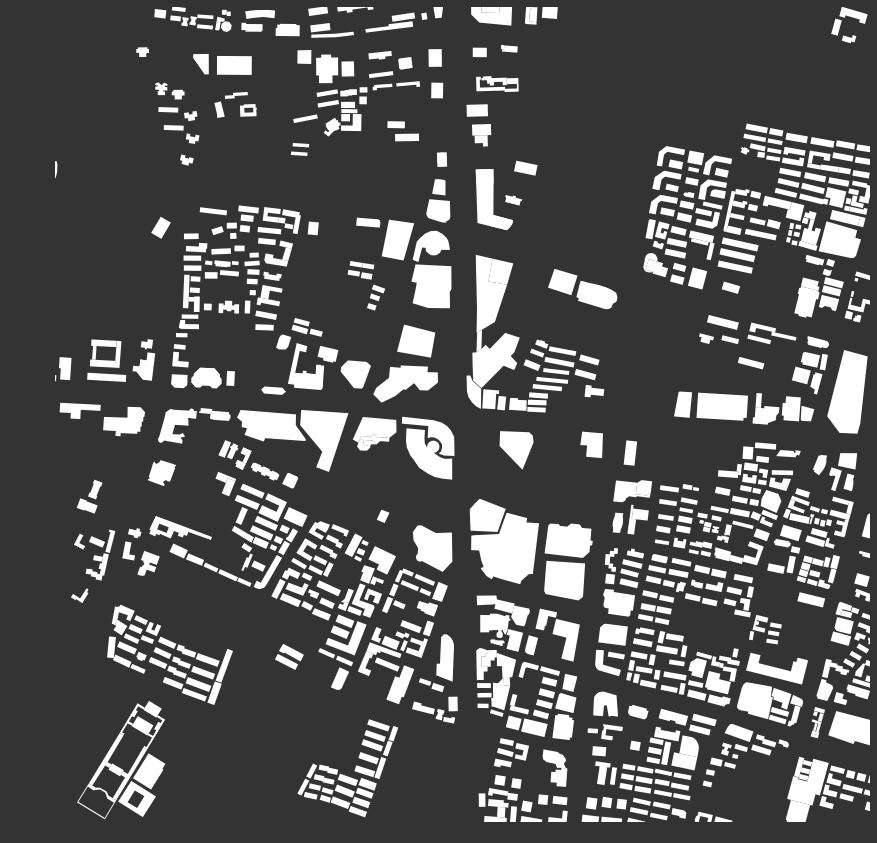

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x194b5568a58>)

In [154]:
point = (32.0438671, 118.7789058)
dist = 1000
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(15,15), bbox=bbox,
                            save=False, show=True, close=True)
#Image('{}/{}.{}'.format(img_folder, 'paris_bldgs', extension), height=size, width=size)